Practice implementation for various predictive models

In [28]:
import pandas as pd
import numpy as np
from binance.client import Client
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read in data

client = Client()

# Set the start date and current date
start_date = "1 Jan, 2020"
end_date = datetime.now().strftime("%d %b, %Y")

# Fetch the klines/candlestick data
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, start_date, end_date)

# Create a DataFrame
df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Convert relevant columns to float
float_columns = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']
df[float_columns] = df[float_columns].astype(float)

# Keep only the columns we're interested in
df = df[['open', 'high', 'low', 'close', 'volume']]

In [3]:
df.head()

,open,high,low,close,volume
timestamp,,,,,
2020-01-01,7195.24,7255.0,7175.15,7200.85,16792.388165
2020-01-02,7200.77,7212.5,6924.74,6965.71,31951.483932
2020-01-03,6965.49,7405.0,6871.04,7344.96,68428.500451
2020-01-04,7345.00,7404.0,7272.21,7354.11,29987.974977
2020-01-05,7354.19,7495.0,7318.00,7358.75,38331.085604


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1653 entries, 2020-01-01 to 2024-07-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1653 non-null   float64
 1   high    1653 non-null   float64
 2   low     1653 non-null   float64
 3   close   1653 non-null   float64
 4   volume  1653 non-null   float64
dtypes: float64(5)
memory usage: 77.5 KB


In [7]:
df.describe(include = 'all')

,open,high,low,close,volume
count,1653.000000,1653.00000,1653.000000,1653.000000,1653.000000
mean,32409.056655,33189.33922,31564.304531,32439.524555,90032.394917
std,17600.722770,18025.21302,17111.059170,17600.567772,94328.321167
min,4800.010000,5365.42000,3782.130000,4800.000000,7308.955420
25%,19041.920000,19349.00000,18471.280000,19056.800000,37381.953765
50%,29430.920000,30061.70000,29031.000000,29445.060000,56086.671500
75%,44171.000000,45492.00000,43174.010000,44179.550000,93009.561008
max,73072.400000,73777.00000,71333.310000,73072.410000,760705.362783


In [9]:
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

/Users/brandonamarasingam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/brandonamarasingam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/brandonamarasingam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/brandonamarasingam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

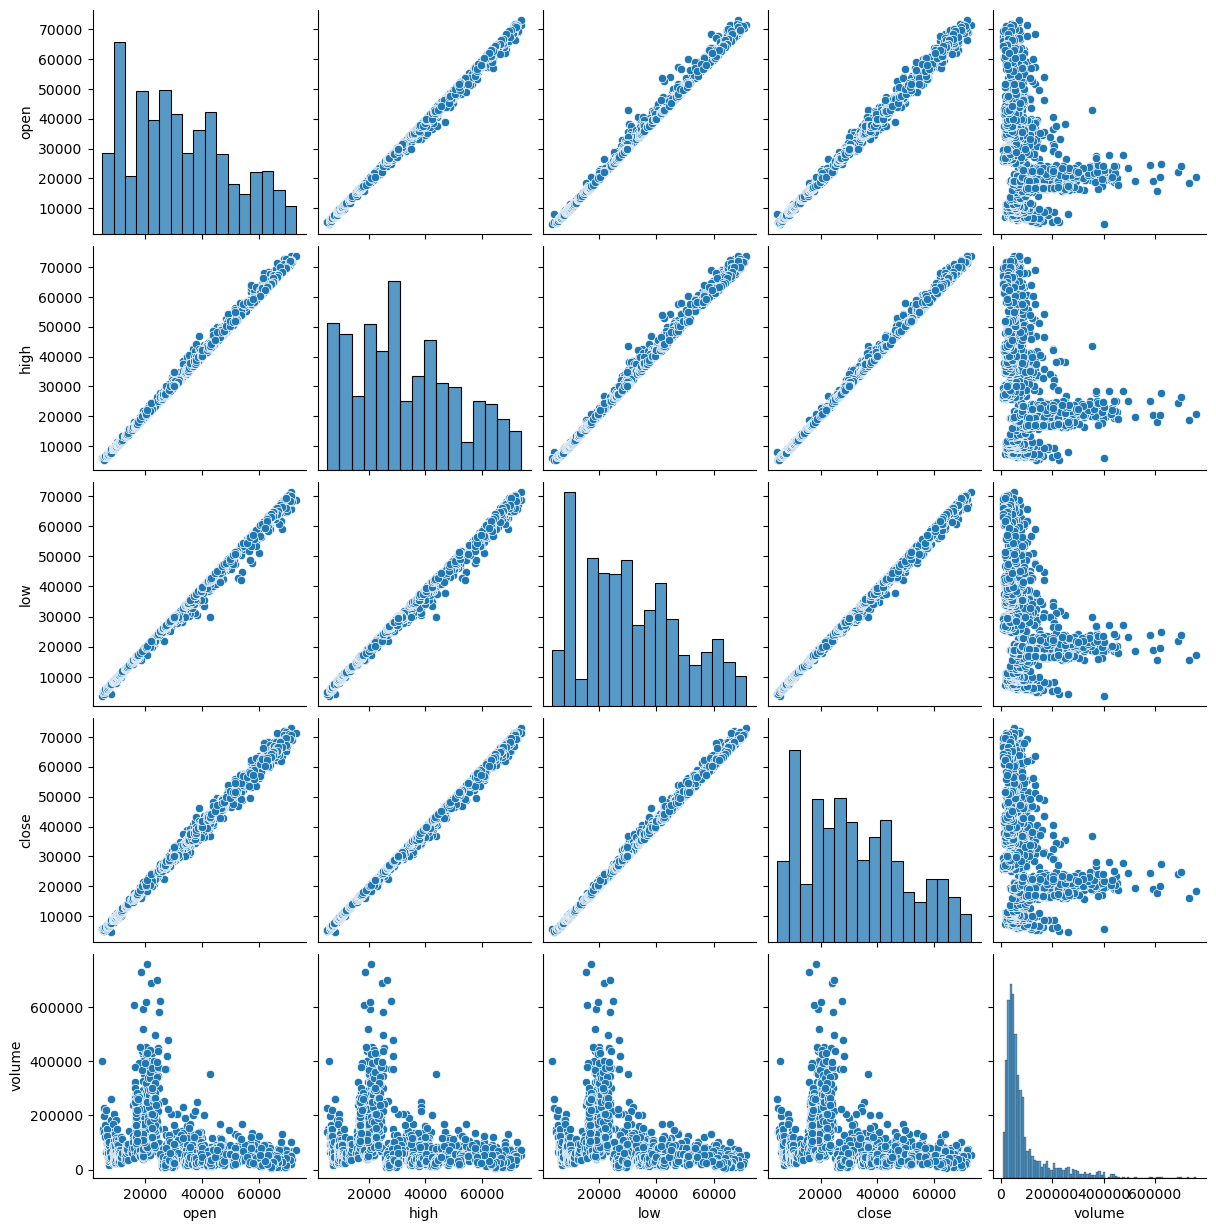

In [14]:
sns.pairplot(df)

In [16]:
X = df[['high', 'low', 'open', 'volume']].values
y = df[['close']].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
lr.coef_

array([[ 8.98073887e-01,  6.05083726e-01, -5.09746143e-01,
        -3.03078618e-04]])

In [21]:
lr.score(X_train, y_train)

0.9989581582680281

In [22]:
predictions = lr.predict(X_test)

In [24]:
r2_score(y_test, predictions)

0.9991041420976537

In [30]:
metrics.mean_absolute_error(y_test, predictions)

336.25811582636936

In [29]:
metrics.mean_squared_error(y_test, predictions)

221923.12707227684

In [25]:
dframe = pd.DataFrame({'actual': y_test.flatten(), 'Predicted': predictions.flatten()})
dframe.head(15)

,actual,Predicted
0,29200.00,29133.318388
1,28730.51,28830.728468
2,26623.41,26469.518040
3,26054.00,26074.910784
4,26100.01,25993.190766
5,26189.99,26090.895728
6,26126.92,25908.943657
7,26056.00,25523.218584
8,26432.72,26477.266357
9,26180.05,26103.596025


<Axes: >

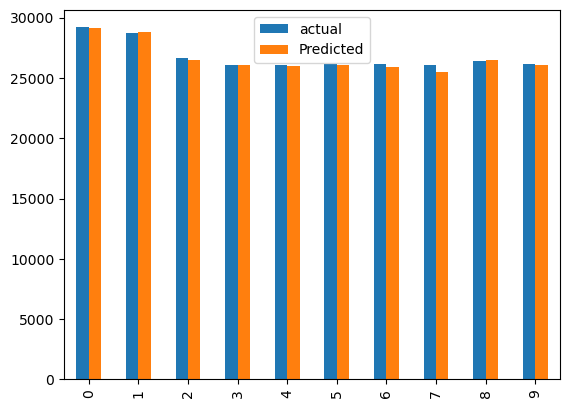

In [26]:
graph = dframe.head(10)
graph.plot(kind = 'bar')